In [14]:
#Import Dependencies 
from pymongo import MongoClient
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats
from scipy.stats import linregress

In [15]:
#read Json file to a data frame
import json
a=json.dumps('combined_json_by_year.json')

In [16]:
df_full = pd.read_json('combined_json_by_year.json') 

In [17]:
df_full.columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

In [18]:
df_full.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
max,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
data,"[{'lat': -89, 'lon': -179, 'value': -1.3591666...","[{'lat': -89, 'lon': -179, 'value': -0.3866666...","[{'lat': -89, 'lon': -179, 'value': 1.61416664...","[{'lat': -89, 'lon': -179, 'value': -0.9783333...","[{'lat': -89, 'lon': -179, 'value': -0.1083332...","[{'lat': -89, 'lon': -179, 'value': 0.94249997...","[{'lat': -89, 'lon': -179, 'value': -0.6033333...","[{'lat': -89, 'lon': -179, 'value': -0.0683333...","[{'lat': -89, 'lon': -179, 'value': 0.32916666...","[{'lat': -89, 'lon': -179, 'value': 1.22499994...",...,"[{'lat': -89, 'lon': -179, 'value': 0.60416666...","[{'lat': -89, 'lon': -179, 'value': 0.21000000...","[{'lat': -89, 'lon': -179, 'value': 0.13416664...","[{'lat': -89, 'lon': -179, 'value': 0.90583334...","[{'lat': -89, 'lon': -179, 'value': 1.76333331...","[{'lat': -89, 'lon': -179, 'value': 0.55833332...","[{'lat': -89, 'lon': -179, 'value': 0.50499998...","[{'lat': -89, 'lon': -179, 'value': -1.3308333...","[{'lat': -89, 'lon': -179, 'value': -0.0583333...","[{'lat': -89, 'lon': -179, 'value': 0.29166664..."


In [19]:
df = df_full.T
df.head()

,time,max,data
2000,2000,6,"[{'lat': -89, 'lon': -179, 'value': -1.3591666..."
2001,2001,6,"[{'lat': -89, 'lon': -179, 'value': -0.3866666..."
2002,2002,6,"[{'lat': -89, 'lon': -179, 'value': 1.61416664..."
2003,2003,6,"[{'lat': -89, 'lon': -179, 'value': -0.9783333..."
2004,2004,6,"[{'lat': -89, 'lon': -179, 'value': -0.1083332..."


In [20]:

pd.json_normalize(df.iloc[0]['data'][0])

test = pd.DataFrame()
for i in range(len(df)):
    test = pd.concat([test, pd.json_normalize(df.iloc[i]['data'][11370])])

In [21]:
test

,lat,lon,value
0,37,-119,0.697500
0,37,-119,1.253333
0,37,-119,0.762500
0,37,-119,1.124167
0,37,-119,0.726667
0,37,-119,0.526667
0,37,-119,0.679167
0,37,-119,1.029167
0,37,-119,0.824167
0,37,-119,0.775000


In [22]:
test.insert(0,"Years", [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023], True)

test.head()

,Years,lat,lon,value
0,2000,37,-119,0.697500
0,2001,37,-119,1.253333
0,2002,37,-119,0.762500
0,2003,37,-119,1.124167
0,2004,37,-119,0.726667


In [23]:
Temps_df = test.reset_index()
Temps_df


,index,Years,lat,lon,value
0,0,2000,37,-119,0.697500
1,0,2001,37,-119,1.253333
2,0,2002,37,-119,0.762500
3,0,2003,37,-119,1.124167
4,0,2004,37,-119,0.726667
5,0,2005,37,-119,0.526667
6,0,2006,37,-119,0.679167
7,0,2007,37,-119,1.029167
8,0,2008,37,-119,0.824167
9,0,2009,37,-119,0.775000


In [24]:
del Temps_df['index']

In [25]:
Temps_df.dtypes

Years      int64
lat        int64
lon        int64
value    float64
dtype: object

In [58]:
Temps_df.drop(index=23, inplace=True)
Temps_df


,Years,lat,lon,value
0,2000,37,-119,0.697500
1,2001,37,-119,1.253333
2,2002,37,-119,0.762500
3,2003,37,-119,1.124167
4,2004,37,-119,0.726667
5,2005,37,-119,0.526667
6,2006,37,-119,0.679167
7,2007,37,-119,1.029167
8,2008,37,-119,0.824167
9,2009,37,-119,0.775000


In [27]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [28]:
# confirm that our new database was created
print(mongo.list_database_names())

['Ca_Fires', 'Cali_Fires', 'admin', 'autosaurus', 'classDB', 'config', 'epa', 'local', 'met', 'petsitly_marketing', 'travel_db', 'uk_food']


In [29]:
# assign the database to a variable name
fire_db = mongo['Cali_Fires']


In [30]:
# review the collections in our new database
print(fire_db.list_collection_names())

['2000_2022']


In [31]:
#assign the collection to a variable

fires = fire_db['2000_2022']

In [32]:
# review a document in the collection
print(fire_db['2000_2022'].find_one())

{'_id': ObjectId('65caf116fa3430cdba0deb75'), 'OBJECTID': 21440, 'YEAR_': 2020, 'STATE': 'CA', 'FIRE_NAME': 'NELSON', 'GIS_ACRES': 109.60228}


In [33]:
# build the aggregation pipeline

match_query = {'$match': {'YEAR_': {'$gte': 2000, '$lte': 2022}}}

sort_values = {'$sort': {'count': -1}}

pipeline = [match_query, sort_values]

In [34]:
# run the pipeline cast as list and save to a variable
results = list(fires.aggregate(pipeline))

In [35]:
# print the number of rows
print(len(results))

7530


In [36]:
#print first 10 results
pprint(results[0:10])

[{'FIRE_NAME': 'NELSON',
  'GIS_ACRES': 109.60228,
  'OBJECTID': 21440,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb75')},
 {'FIRE_NAME': 'AMORUSO',
  'GIS_ACRES': 685.58502,
  'OBJECTID': 21441,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb76')},
 {'FIRE_NAME': 'ATHENS',
  'GIS_ACRES': 27.30048,
  'OBJECTID': 21442,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb77')},
 {'FIRE_NAME': 'FLEMING',
  'GIS_ACRES': 12.931545,
  'OBJECTID': 21443,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb78')},
 {'FIRE_NAME': 'MELANESE',
  'GIS_ACRES': 10.315964,
  'OBJECTID': 21444,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb79')},
 {'FIRE_NAME': 'PFE',
  'GIS_ACRES': 36.701931,
  'OBJECTID': 21445,
  'STATE': 'CA',
  'YEAR_': 2020,
  '_id': ObjectId('65caf116fa3430cdba0deb7a')},
 {'FIRE_NAME': 'VALLEY',
  'GIS_ACRES': 376.9104,
  'OBJECTID': 21446,
  'ST

In [37]:
# save to dataframe
Ca_df = pd.json_normalize(results)
# drop unwanted columns
columns_to_drop = ['OBJECTID', '_id']
Ca_df.drop(columns=columns_to_drop, inplace=True)
# print results
Ca_df.head()

,YEAR_,STATE,FIRE_NAME,GIS_ACRES
0,2020,CA,NELSON,109.602280
1,2020,CA,AMORUSO,685.585020
2,2020,CA,ATHENS,27.300480
3,2020,CA,FLEMING,12.931545
4,2020,CA,MELANESE,10.315964


In [38]:
# rename columns

Ca_df = Ca_df.rename(columns={'YEAR_': 'Year',
                             'GIS_ACRES': 'Acres_Burned',
                             'STATE': 'State',
                             'FIRE_NAME': 'Fire_Name'})
# print new columns
Ca_df.head(10)

,Year,State,Fire_Name,Acres_Burned
0,2020,CA,NELSON,109.602280
1,2020,CA,AMORUSO,685.585020
2,2020,CA,ATHENS,27.300480
3,2020,CA,FLEMING,12.931545
4,2020,CA,MELANESE,10.315964
5,2020,CA,PFE,36.701931
6,2020,CA,VALLEY,376.910400
7,2020,CA,WALDO,10.102212
8,2020,CA,WILLOW,33.973888
9,2020,CA,WILLOWS,1309.090000


In [39]:
max_acres = Ca_df.groupby('Year')['Acres_Burned'].max()
max_acres

Year
2000      79223.430
2001      34218.848
2002     501082.030
2003     270686.000
2004      38763.016
2005      63771.406
2006     161815.660
2007     240358.700
2008     163606.690
2009     160833.110
2010      16448.225
2011      25939.012
2012     315511.500
2013     256175.530
2014     133177.380
2015     151546.810
2016     132104.280
2017     281790.880
2018     410202.470
2019      77762.141
2020    1032699.600
2021     963405.440
2022      76771.445
Name: Acres_Burned, dtype: float64

In [43]:
# Create Df
max_acres_df = pd.DataFrame({'Year': max_acres.index, 'Max_Acres_Burned': max_acres.values})

# Display the DataFrame
print(max_acres_df)

    Year  Max_Acres_Burned
0   2000         79223.430
1   2001         34218.848
2   2002        501082.030
3   2003        270686.000
4   2004         38763.016
5   2005         63771.406
6   2006        161815.660
7   2007        240358.700
8   2008        163606.690
9   2009        160833.110
10  2010         16448.225
11  2011         25939.012
12  2012        315511.500
13  2013        256175.530
14  2014        133177.380
15  2015        151546.810
16  2016        132104.280
17  2017        281790.880
18  2018        410202.470
19  2019         77762.141
20  2020       1032699.600
21  2021        963405.440
22  2022         76771.445


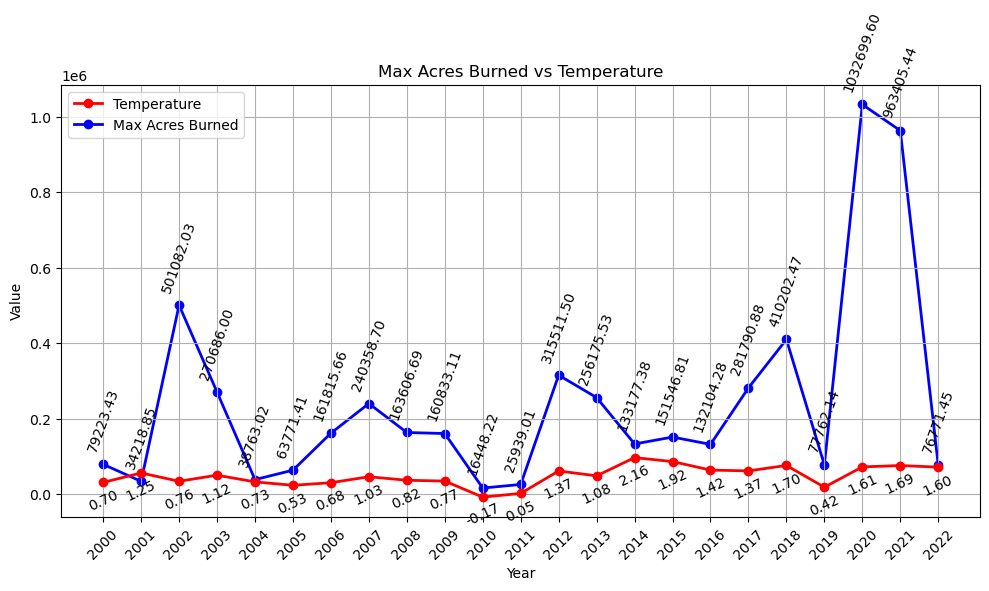

In [102]:

# Scale factor for temperature values
temp_scale_factor = 45000  # Adjust as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of the lines
line_width = 2

# Set the positions for the lines
years = max_acres_df['Year']
years_temp = Temps_df['Years']

# Plot temperature (scaled) as a line
temp_line = ax.plot(years_temp, Temps_df['value'] * temp_scale_factor, marker='o', linestyle='-', color='red', linewidth=line_width, label='Temperature', zorder=2)

# Plot maximum acres burned as a line
max_acres_line = ax.plot(years, max_acres_df['Max_Acres_Burned'], marker='o', linestyle='-', color='blue', linewidth=line_width, label='Max Acres Burned', zorder=1)

# Add annotations for temperature points
for i, txt in enumerate(Temps_df['value']):
    ax.annotate(f"{txt:.2f}", (years_temp[i], Temps_df['value'][i] * temp_scale_factor), textcoords="offset points", xytext=(0, -20), ha='center', color='black', rotation=25)

    # Add annotations for maximum acres burned points
for i, txt in enumerate(max_acres_df['Max_Acres_Burned']):
    ax.annotate(f"{txt:.2f}", (years[i], max_acres_df['Max_Acres_Burned'][i]), textcoords="offset points", xytext=(0, 10), ha='center', color='black', rotation=70)

    # Add title and labels
ax.set_title('Max Acres Burned vs Temperature')
ax.set_xlabel('Year')
ax.set_ylabel('Value')

# Set x-axis ticks and labels
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)

# Show grid and legend
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.savefig('C:/Repos/project3a/project_3/static/pages/Fire_Graphs/Max_Acres_Vs_Temp.png')
plt.show()
